### KELOMPOK 5
1. Arya Aydin Margono (2203484)
2. Jason Rafif Pangestu Suryoatmojo (2204524)
3. Muhammad Fahreza Fauzan (2204509)
4. Muhammad Rizki Revandi (2205027)
5. Ridho Alif Naufaldy (2204896)

## PRAPROSES DATA
* Mengubah huruf-huruf pada nama atribut menjadi lowercase
* Mengubah spasi (“ “) menjadi “_”
* Menghapus kolom rincian pengeluaran pada file "Data APBD Tahun 2021"
* Menghapus row terakhir pada kedua file karena berisi penjumlahan dari tiap kolom
* Mengubah nama atribut “no” pada file “Data APBD Tahun 2021” menjadi “kd_prov”
* Mengubah data type “kd_prov” pada kedua file menjadi integer
* Value atribut “kd_prov” pada file “Data APBD Tahun 2021” diubah menjadi value atribut “kd_prov” pada file “Kemantapan Jalan Nasional Tahun 2021”
* Membuat atribut “kd_prov” menjadi index pada kedua data
* Menghapus “DKI Jakarta” karena pada file “Kemantapan Jalan Nasional Tahun 2021”, sama sekali tidak ada data


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df1 = pd.read_csv("D:\\Arya\\Kuliah\\Semester 3\\Data Mining\\Data\\Kemantapan Jalan Nasional Tahun 2021.csv")
df1.head(5)

,Kd_Prov,Provinsi,Total_Panjang,Mantap_km,Mantap_%,TMantap_km,TMantap_%
0,11,Aceh,2102.07,2064.02,98.19,38.05,1.81
1,12,Sumatera Utara,2632.22,2507.72,95.27,124.50,4.73
2,13,Sumatera Barat,1449.62,1339.59,92.41,110.03,7.59
3,14,Riau,1336.61,1159.51,86.75,177.10,13.25
4,15,Jambi,1317.93,1231.61,93.45,86.32,6.55


In [3]:
df2 = pd.read_csv("D:\\Arya\\Kuliah\\Semester 3\\Data Mining\\Data\\Data APBD Tahun 2021.csv")
df2.head(5)

,No,Provinsi,Penerimaan,Penerimaan Pembiayaan,Jumlah Penerimaan,Pengeluaran,Pengeluaran Pembiayaan,Jumlah Pengeluaran
0,1,Aceh,13864978,2887076,16752054,16445054,307000,16752054
1,2,Sumatera Utara,13517499,439000,13956499,13749499,207000,13956499
2,3,Sumatera Barat,6580124,220000,6800124,6780124,20000,6800124
3,4,Riau,9032749,100000,9132749,9132749,0,9132749
4,5,Jambi,4294675,239474,4534149,4516149,18000,4534149


Eksplorasi data set

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kd_Prov        35 non-null     object 
 1   Provinsi       35 non-null     object 
 2   Total_Panjang  35 non-null     float64
 3   Mantap_km      35 non-null     float64
 4   Mantap_%       35 non-null     float64
 5   TMantap_km     35 non-null     float64
 6   TMantap_%      35 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.0+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   No                      35 non-null     object
 1   Provinsi                34 non-null     object
 2   Penerimaan              35 non-null     int64 
 3   Penerimaan Pembiayaan   35 non-null     int64 
 4   Jumlah Penerimaan       35 non-null     int64 
 5   Pengeluaran             35 non-null     int64 
 6   Pengeluaran Pembiayaan  35 non-null     int64 
 7   Jumlah Pengeluaran      35 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.3+ KB


Mengubah nama atribut menjadi lowercase

In [6]:
df1 = df1.rename(columns=str.lower)

Menghapus baris terakhir pada file karena berisi penjumlahan dari tiap kolom (data tidak digunakan)

In [7]:
df1 = df1.drop(34)

Mengubah data type kd_prov menjadi integer

In [8]:
df1['kd_prov'] = df1['kd_prov'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kd_prov        34 non-null     int32  
 1   provinsi       34 non-null     object 
 2   total_panjang  34 non-null     float64
 3   mantap_km      34 non-null     float64
 4   mantap_%       34 non-null     float64
 5   tmantap_km     34 non-null     float64
 6   tmantap_%      34 non-null     float64
dtypes: float64(5), int32(1), object(1)
memory usage: 1.9+ KB


Mengubah nama atribut menjadi lowercase dan mengubah spasi menjadi underscore

In [9]:
df2 = df2.rename(columns=str.lower)
df2.columns = df2.columns.str.replace(' ', '_', regex=True)

Menghapus kolom rincian pengeluaran karena tidak digunakan

In [10]:
df2 = df2.drop(["pengeluaran", "pengeluaran_pembiayaan", "jumlah_pengeluaran"], axis=1)

Menghapus baris terakhir pada file karena berisi penjumlahan dari tiap kolom (data tidak digunakan)

In [11]:
df2 = df2.drop(34)

Mengubah nama kolom "no" menjadi "kd_prov" agar selaras dengan file "Kemantapan Jalan Tahun 2021" dan mengubah data type "kd_prov" menjadi integer

In [12]:
df2.rename(columns={"no":"kd_prov"}, inplace=True)
df2['kd_prov'] = df2['kd_prov'].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   kd_prov                34 non-null     int32 
 1   provinsi               34 non-null     object
 2   penerimaan             34 non-null     int64 
 3   penerimaan_pembiayaan  34 non-null     int64 
 4   jumlah_penerimaan      34 non-null     int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 1.3+ KB


Mengubah value "kd_prov" pada file "Data APBD Tahun 2021" dengan value "kd_prov" pada file "Kemantapan Jalan Tahun 2021"

In [13]:
df2["kd_prov"] = df1["kd_prov"]
df2.head(5)

,kd_prov,provinsi,penerimaan,penerimaan_pembiayaan,jumlah_penerimaan
0,11,Aceh,13864978,2887076,16752054
1,12,Sumatera Utara,13517499,439000,13956499
2,13,Sumatera Barat,6580124,220000,6800124
3,14,Riau,9032749,100000,9132749
4,15,Jambi,4294675,239474,4534149


Menjadikan atribut "kd_prov" menjadi index pada kedua data frame

In [14]:
df1 = df1.set_index("kd_prov")
df2 = df2.set_index("kd_prov")
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 11 to 94
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provinsi       34 non-null     object 
 1   total_panjang  34 non-null     float64
 2   mantap_km      34 non-null     float64
 3   mantap_%       34 non-null     float64
 4   tmantap_km     34 non-null     float64
 5   tmantap_%      34 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 11 to 94
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   provinsi               34 non-null     object
 1   penerimaan             34 non-null     int64 
 2   penerimaan_pembiayaan  34 non-null     int64 
 3   jumlah_penerimaan      34 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


Menghapus data "DKI Jakarta" karena data tersebut kosong pada file "Kemantapan Jalan Tahun 2021"

In [15]:
df1 = df1.drop(31)
df2 = df2.drop(31)

In [16]:
df1.head(33)

,provinsi,total_panjang,mantap_km,mantap_%,tmantap_km,tmantap_%
kd_prov,,,,,,
11,Aceh,2102.07,2064.02,98.19,38.05,1.81
12,Sumatera Utara,2632.22,2507.72,95.27,124.50,4.73
13,Sumatera Barat,1449.62,1339.59,92.41,110.03,7.59
14,Riau,1336.61,1159.51,86.75,177.10,13.25
15,Jambi,1317.93,1231.61,93.45,86.32,6.55
16,Sumatera Selatan,1600.16,1492.15,93.25,108.01,6.75
17,Bengkulu,792.61,757.74,95.60,34.87,4.40
18,Lampung,1292.21,1213.26,93.89,78.95,6.11
19,Kepulauan Bangka Belitung,600.40,597.04,99.44,3.36,0.56


In [17]:
df2.head(33)

,provinsi,penerimaan,penerimaan_pembiayaan,jumlah_penerimaan
kd_prov,,,,
11,Aceh,13864978,2887076,16752054
12,Sumatera Utara,13517499,439000,13956499
13,Sumatera Barat,6580124,220000,6800124
14,Riau,9032749,100000,9132749
15,Jambi,4294675,239474,4534149
16,Sumatera Selatan,10205021,626485,10831506
17,Bengkulu,3062274,5000,3067274
18,Lampung,7593705,58790,7652495
19,Bangka Belitung,2568266,540361,3108627


Menggolongkan jumlah penerimaan dari tiap provinsi menjadi beberapa golongan

gol I       = [0, 3.000.000)
<br>
gol II      = [3.000.000, 4.000.000)
<br>
gol III     = [4.000.000, 5.000.000)
<br>
gol IV      = [5.000.000, 6.000.000)
<br>
gol V       = [6.000.000, 7.000.000)
<br>
gol VI      = [7.000.000, 8.000.000)
<br>
gol VII     = [8.000.000, 9.000.000)
<br>
gol VIII    = [9.000.000, 10.000.000)
<br>
gol IX      = [10.000.000, 20.000.000)
<br>
gol X       = [20.000.000, 30.000.000)
<br>
gol XI      = [30.000.000, 50.000.000)

In [18]:
range_category = [0, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 20000000, 30000000, 50000000]
category = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI']

df2['gol_pemasukan'] = pd.cut(df2['jumlah_penerimaan'], bins=range_category, labels=category, right=False)

Merge/join kedua data frame berdasarkan kd_prov

In [19]:
df3 = pd.merge(df1, df2, how="left", on=["kd_prov"])
df3.head(33)

,provinsi_x,total_panjang,mantap_km,mantap_%,tmantap_km,tmantap_%,provinsi_y,penerimaan,penerimaan_pembiayaan,jumlah_penerimaan,gol_pemasukan
kd_prov,,,,,,,,,,,
11,Aceh,2102.07,2064.02,98.19,38.05,1.81,Aceh,13864978,2887076,16752054,IX
12,Sumatera Utara,2632.22,2507.72,95.27,124.50,4.73,Sumatera Utara,13517499,439000,13956499,IX
13,Sumatera Barat,1449.62,1339.59,92.41,110.03,7.59,Sumatera Barat,6580124,220000,6800124,V
14,Riau,1336.61,1159.51,86.75,177.10,13.25,Riau,9032749,100000,9132749,VIII
15,Jambi,1317.93,1231.61,93.45,86.32,6.55,Jambi,4294675,239474,4534149,III
16,Sumatera Selatan,1600.16,1492.15,93.25,108.01,6.75,Sumatera Selatan,10205021,626485,10831506,IX
17,Bengkulu,792.61,757.74,95.60,34.87,4.40,Bengkulu,3062274,5000,3067274,II
18,Lampung,1292.21,1213.26,93.89,78.95,6.11,Lampung,7593705,58790,7652495,VI
19,Kepulauan Bangka Belitung,600.40,597.04,99.44,3.36,0.56,Bangka Belitung,2568266,540361,3108627,II


## Representasi Data

Membandingkan total_panjang dan mantap_km pada tiap golongan pemasukan

C:\Users\margo\AppData\Local\Temp\ipykernel_7832\200392113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfGroup = df3.groupby(['gol_pemasukan'])[['mantap_km', 'total_panjang']].mean()


<Axes: xlabel='gol_pemasukan'>

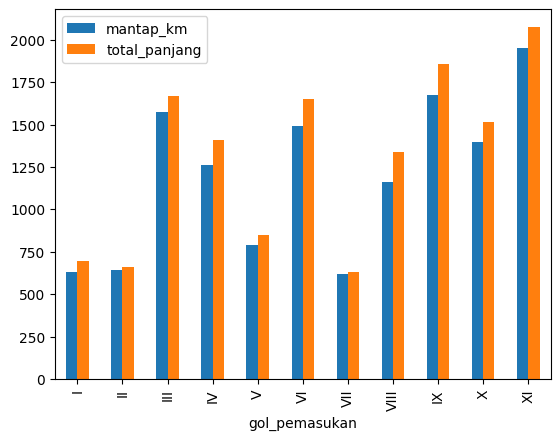

In [20]:
dfGroup = df3.groupby(['gol_pemasukan'])[['mantap_km', 'total_panjang']].mean()
dfGroup.plot(kind='bar')

Persebaran total_panjang berdasarkan gol_pemasukan

C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

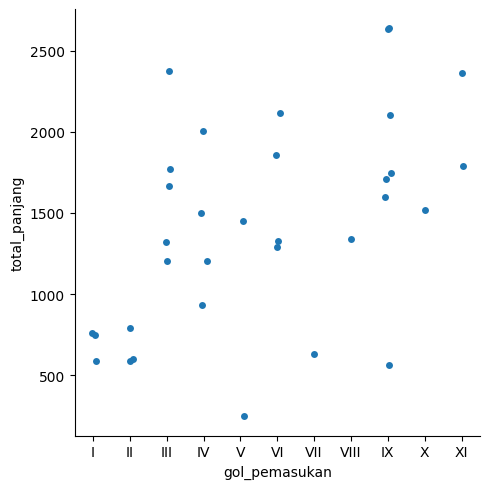

In [21]:
sns.catplot(x="gol_pemasukan", y="total_panjang", data=df3, height=5)

Persebaran mantap_km berdasarkan gol_pemasukan

C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

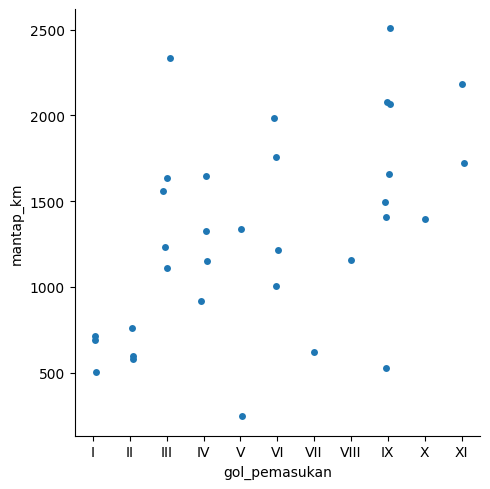

In [22]:
sns.catplot(x="gol_pemasukan", y="mantap_km", data=df3, height=5)

Persebaran mantap_% berdasarkan gol_pemasukan

C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

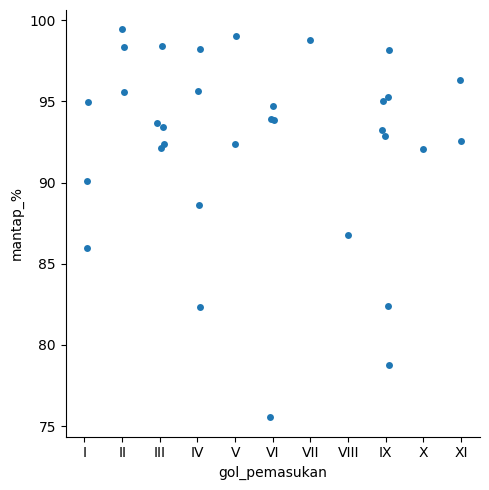

In [23]:
sns.catplot(x="gol_pemasukan", y="mantap_%", data=df3, height=5)

Persebaran tmantap_km berdasarkan gol_pemasukan

C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

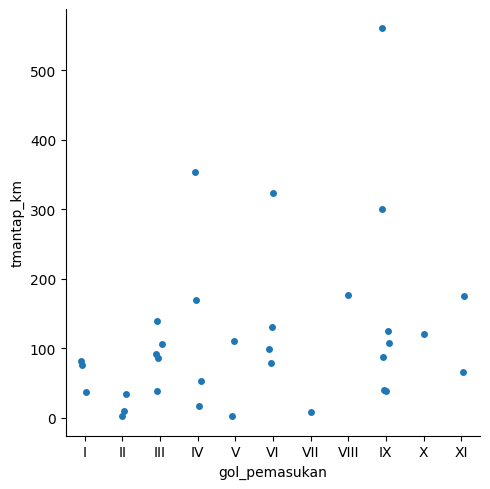

In [24]:
sns.catplot(x="gol_pemasukan", y="tmantap_km", data=df3, height=5)

Persebaran tmantap_% berdasarkan gol_pemasukan

C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\margo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

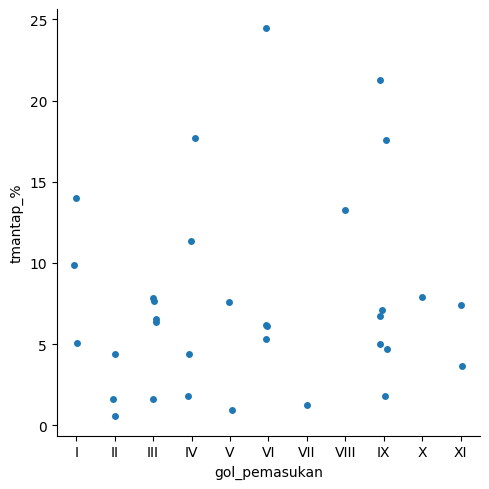

In [25]:
sns.catplot(x="gol_pemasukan", y="tmantap_%", data=df3, height=5)

## Analisis
Dapat dilihat menurut trend grafik pemasukan dan total jalan bahwa relasi antara pemasukan dan total jalan per daerah berbanding lurus (linear). Sementara itu, relasi pemasukan dan kemantapan jalan juga berbanding lurus. Secara umum, jika semakin tinggi pemasukan di suatu daerah, maka semakin tinggi juga kemantapan dan total jalannya.